# RQ1: Are Number of Reviews and Ratings an Indicator of Success?

### Part 1: How are ratings and number of reviews related to a business’ popularity and its probability of failure?
- a) How do ratings relate to business popularity?
- b) How do number of reviews relate to probability of failure?
- c) How to ratings relate to probability of failure?
- d) How do ratings relate to lifespan of a business?

### Part 2: How do ratings change over time? Is there a clear profile difference between open and closed businesses?

- a) How do ratings deviate during each quarter of a business lifespan for open vs closed?
- b) How does average rating change during each quarter?

In [4]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines


module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%matplotlib inline

In [5]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, linees, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 22

In [6]:
df = pd.read_pickle('../../data/analysis/businessFinal.pkl')
revInfo = pd.read_pickle('../../data/prep/reviewInfo.pkl')
stdDF = pd.read_pickle('../../data/final/ratingDeviation.pkl')
new = pd.read_pickle('../../data/final/ratingChange.pkl')

## How Do Ratings Relate to Business Popularity?

[Text(0,0,'1.0'),
 Text(0,0,'1.5'),
 Text(0,0,'2.0'),
 Text(0,0,'2.5'),
 Text(0,0,'3.0'),
 Text(0,0,'3.5'),
 Text(0,0,'4.0'),
 Text(0,0,'4.5'),
 Text(0,0,'5.0')]

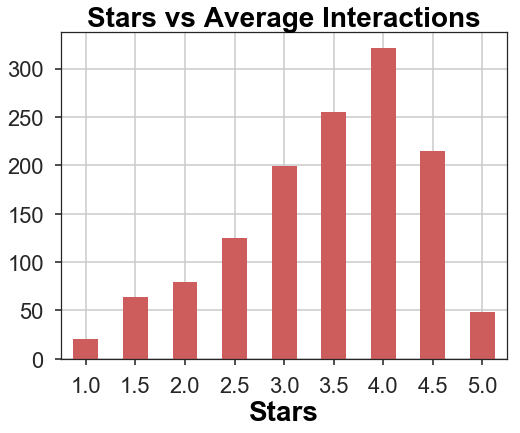

In [7]:
ratings = df.groupby('stars')

plt = ratings['interactionsWeighted'].mean().plot(kind='bar', color = 'indianred', figsize=(8,6))
plt.set_title("Stars vs Average Interactions")
plt.set_ylabel('')
plt.set_xlabel('Stars')
labels = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
plt.set_xticklabels(labels,rotation=0)

### Conclusions:
In general, popularity/interactions get higher as ratings get higher. However, this starts to fall when it comes to 4.5 and above. There are a lot of 5 star businesses to interact with in our dataset (27000!) but Yelp users don't interact with them much. They aren't checking in or leaving reviews and tips for them often compared to other businesses.

## How Do Number of Reviews Relate to Probability of Failure?

The graph below groups the businesses by their reviews-per-daym which is their total number of reviews divided by its lifespan.

Text(0.5,1,'Closure Rate vs. Reviews per Day')

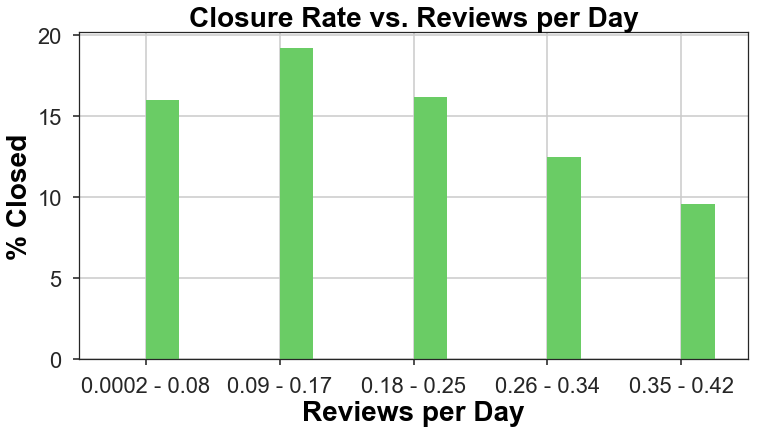

In [8]:
#rpd (reviews per day) will caluclate number of reviews divided by lifespan.
def rpd(a, b):
    if a > 0 and b > 0:
        revPerDay = float(a/b)
        return revPerDay
    else: 
        return a

#Make a column to represent a businesses reviews per day.
revInfo['rpd'] = revInfo.apply(lambda row: rpd(row['review_count'], row['lifespan']), axis=1) #calculate review per day

mask = revInfo['rpd'] < 0.42 #focus on the 99% of the group
rpdFrame = revInfo[mask].copy()

rpdGroups = pd.cut(rpdFrame['rpd'], 5)
rpdFrame['range'] = pd.Series(rpdGroups, index=rpdFrame.index)
rpdFrame = rpdFrame.reset_index()
pct = rpdFrame.groupby(['range', 'is_open']).agg({'index': 'size'})
rpd_pcts = pct.groupby(['range']).apply(lambda x: 100 * x / float(x.sum()))

rpd_pcts = rpd_pcts.reset_index()

rpd_pcts = rpd_pcts[rpd_pcts['is_open'] == 0]
plt = rpd_pcts.plot(kind='bar', legend=False, figsize=(12,6))
labels = ["0.0002 - 0.08", "0.09 - 0.17", "0.18 - 0.25", "0.26 - 0.34", "0.35 - 0.42"]
plt.set_xticklabels(labels, rotation=0)
plt.set_xlabel("Reviews per Day")
plt.set_ylabel("% Closed")
plt.set_title("Closure Rate vs. Reviews per Day")

### Conclusions:
The more frequently a business is reviewed, the less likely it is to close. One outlier is that the group reviewed the least frequently (0.002 - 0.08) has a lower closure rate than the 0.09-0.17 category. However after this, there is a downward trend proving that more frequent reviews contribute to an increased chance of staying open.

## How Do Ratings Relate to Probability of Failure?

Text(0.5,1,'% Closed by Rating')

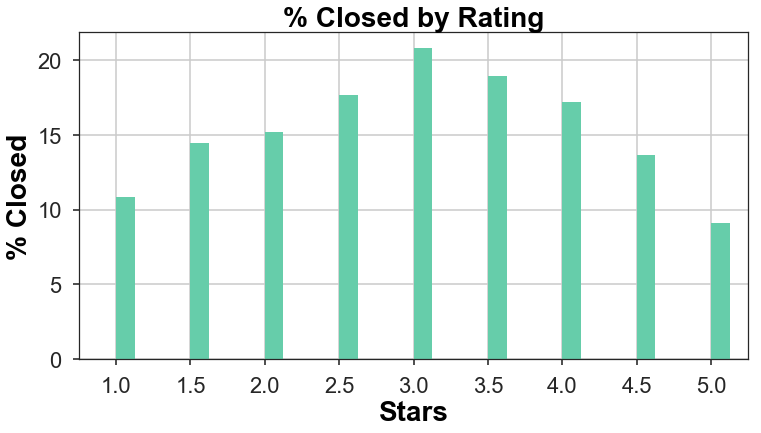

In [9]:
pct_open = df.groupby(['stars', 'is_open']).agg({'business_id': 'size'})
pcts = pct_open.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
openstarsDF = pcts.reset_index()
openstarsDF = openstarsDF.set_index('stars')
closedStarsDF = openstarsDF[openstarsDF['is_open'] == 0]
closedStarsDF

plt = closedStarsDF.plot(kind='bar', legend=False, figsize=(12,6), color='mediumaquamarine')
labels = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
plt.set_xticklabels(labels,rotation=0)
plt.set_ylabel('% Closed')
plt.set_xlabel('Stars')
plt.set_title("% Closed by Rating")

### Conclusions:
We can see an interesting trend here. Unsuprisingly, 5 star businesses close the least. However, 1 star businesses close just as frequently. 3 stars seems to be the most 'dangerous' rating as 1/5th of these have closed down.

## How do Ratings Relate to the Lifespan of a Business?

Text(0.5,0,'Stars')

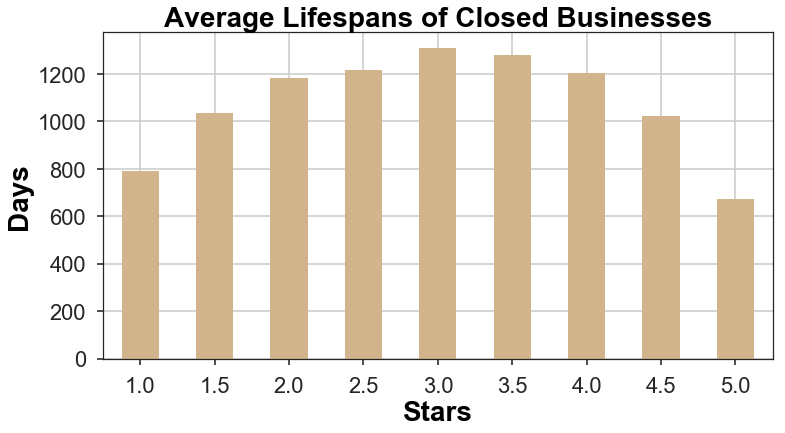

In [10]:
closedAnalysis = revInfo[revInfo['is_open'] == 0] #choose just the closed businesses from teh lifespan table

stars = closedAnalysis.groupby('stars')
plt = stars.mean().plot(kind='bar', y ='lifespan',legend=False, figsize=(12,6), color='tan')
plt.set_title("Average Lifespans of Closed Businesses")
labels = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
plt.set_xticklabels(labels,rotation=0)
plt.set_ylabel('Days')
plt.set_xlabel('Stars')

### Conclusions:
Here, we can see that 1 and 5 star businesses last the shortest amount of time. 3 star businesses survive the longest before they close down.

## How Do Ratings Deviate During Each Quarter of a Business Lifespan for Open vs Closed?

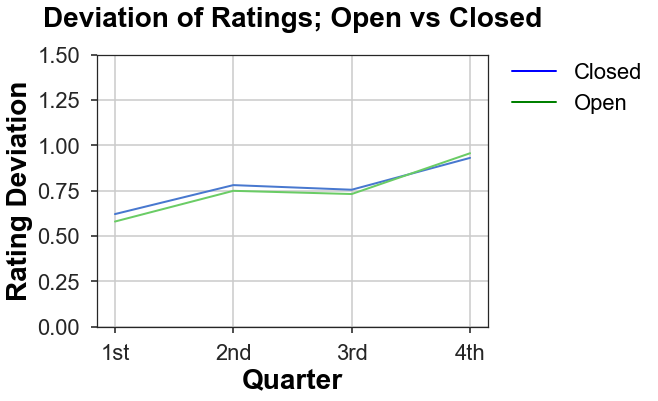

In [11]:
plt = stdDF.plot(figsize=(7,5), ylim=(0,1.5))
labels = ["", "1st", "2nd", "3rd", "4th"]
plt.set_title("Deviation of Ratings; Open vs Closed", y=1.08)
plt.set_xlabel('Quarter')
plt.set_ylabel('Rating Deviation')
plt.set_xticklabels(labels,rotation=0)

#Make the legend
blue_line = mlines.Line2D([], [], color='blue', marker='', markersize=15, label='Closed')
green_line = mlines.Line2D([], [], color='green', marker='', markersize=15, label='Open')
handles = [blue_line, green_line]
plt.legend(handles=handles, loc=(1.04, 0.75))

### Conclusions:
Surprisingly, closed and open businesses change in nearly the exact same way, as we can see from this graph. They both start with deviating by half a star at the start of life, then varying more for the second, falling slightly for the 3rd, and then climbing toward one for the last quarter of life.

## How Does Average Rating Change During Each Quarter?

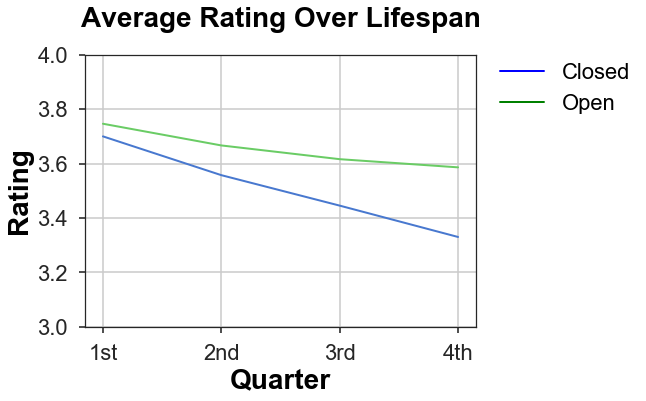

In [12]:
plt = new.plot(legend=False, ylim=(3,4),figsize=(7,5))

labels = ["", "1st", "2nd", "3rd", "4th"]
plt.set_title("Average Rating Over Lifespan", y=1.08)
plt.set_xlabel('Quarter')
plt.set_ylabel('Rating')
plt.set_xticklabels(labels,rotation=0)

#Make legend
blue_line = mlines.Line2D([], [], color='blue', marker='', markersize=15, label='Closed')
green_line = mlines.Line2D([], [], color='green', marker='', markersize=15, label='Open')
handles = [blue_line, green_line]
plt.legend(handles=handles, loc=(1.04, 0.75))

### Conclusions:
This graph shows that closed and open businesses start out more or less the same, at around 3.7 stars. Both fall, but closed businesses far more steeply as time progresses. Upon closure, closed businesses have fallen to the low 3's while open still lingers at the top.

# Overall Conclusions:
- Higher ratings do indicate higher levels of popularity, however only up to 4 stars. 4.5 and 5 stars show steep drops in the number of people interacting with them.
- The more frequently reviewed a business is, the more likely it is to stay open.
- A business has less chance of closing while holding 1 or 5 stars, however those that do close, close fast.
- 3 star businesses survive the longest before closing.
- Getting mixed ratings as time progresses is completely normal for all businesses; it does not indiciate success nor failure.
- A steep drop from toward a lower star rating as time progresses can indicate a business is headed toward failure.

# Are Number of Reviews and Ratings an Indicator of Success?

### Part 1: How are ratings and number of reviews related to a business’ popularity and its probability of failure?
- Popularity increases with higher ratings, but excellent 4.5/5 star ratings do not reflect a popular business.
- A 3 star business is at the highest risk of closure; The extreme ends of the scale (1 and 5 star) have the least risk of closure.
- 3 star businesses survive the longest before their closure; a 5 star or 1 star business will close the quickest if it does close.

### Part 2: How do ratings change over time? Is there a clear profile difference between open and closed businesses?
- In terms of mixed reviews, there is no clear profile difference between open and closed businesses. Ratings will tend to deviate by a star rating as time progresses.
- Ratings will fall faster for closed businesses, on average from a "high" 3 to a "low" 3. Open businesses tend to stay in the "high" 3 area. 

## To conclude:
Businesses define "success" in many different ways.
- If the goal is __popularity__, a 4 star rating is the best. 1 and 5 star businesses tend to not attract a lot of Yelp visitors.
- If the goal is __longetivity__, a 3 star ratings lasts the longest amount of time.
- If the goal is being __open__, 1 and 5 star businesses have the least chance of closure. Attaining frequent reviews also decreases chances of closure.

If monitoring Yelp reviews in order to __predict closure__;
- Mixed reviews are normal and can't be used to predict closure.
- A steep drop in average rating can indicate the business is headed toward closure.

